# New Notebook

In [3]:
# -----------------------------
# Imports
# -----------------------------
from langchain_community.llms import Ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from neo4j import GraphDatabase
import os


In [12]:

# -----------------------------
# Setup Ollama LLM & Embeddings
# -----------------------------
llm = Ollama(model="llama3.1")
embeddings = OllamaEmbeddings(model="llama3.1")

# -----------------------------
# Setup Neo4j
# -----------------------------
NEO4J_URI = "bolt://localhost:7687"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "your_password"
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))


In [13]:
driver

In [14]:

# -----------------------------
# Input document
# -----------------------------
document_text = """
OpenAI's CEO Sam Altman met with Elon Musk and Sundar Pichai in San Francisco.
They discussed future AI safety and potential partnerships.
Satya Nadella also joined later in the evening.
"""

# -----------------------------
# Text Splitter
# -----------------------------
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
chunks = splitter.split_text(document_text)
print(f"📝 Chunks: {len(chunks)}")

# -----------------------------
# Create Embeddings
# -----------------------------
vector_db = FAISS.from_texts(chunks, embedding=embeddings)
print("✅ Embeddings created & stored in FAISS")


📝 Chunks: 1
✅ Embeddings created & stored in FAISS


In [18]:

# -----------------------------
# NER with Ollama
# -----------------------------
prompt = f"""
Extract all PERSON names from this text. 
Return as a comma-separated list only, no explanations.

Text:
{document_text}
"""

person_list_text = llm(prompt)
persons = [p.strip() for p in person_list_text.split(",") if p.strip()]
print("👤 Persons found:", persons)


👤 Persons found: ['Sam Altman', 'Elon Musk', 'Sundar Pichai', 'Satya Nadella']


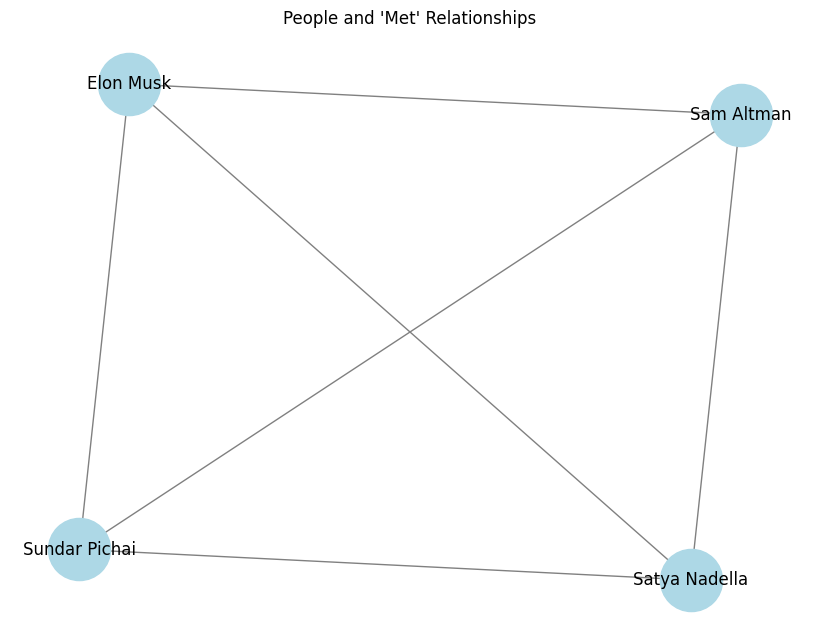

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Example graph
G = nx.Graph()

G = nx.Graph()

# Add nodes (persons)
G.add_nodes_from(persons)

# Add 'Met' relationships between everyone mentioned together
for i in range(len(persons)):
    for j in range(i + 1, len(persons)):
        G.add_edge(persons[i], persons[j])

# -----------------------------
# 7️⃣ Visualize the graph
# -----------------------------
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=2000, edge_color="gray", font_size=12)
plt.title("People and 'Met' Relationships")
plt.show()